<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw3_implied_volatility_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 3, Part 2: Implied Volatility

First, we prove as the assignment outlined.

Prove the following facts: Suppose $f$ is a function satisfying
* $f$: $[0, \infty) \mapsto (f_{min}, f_{max})$
* $f$ is continuous
* $f$ is strictly increasing

Then, for any $p \in (f_{min},f_{max})$ there exists a unique $\hat \sigma$, s.t. $f(\hat \sigma) = p$.

Further, $$\hat \sigma = argmin_{\sigma \in (0, \infty)}|f(\sigma)-p|.$$

__Proof of Statement 1__

First, we prove the "initial statement" about uniqueness. Therefore we need to show that given a value $p \in (f_{min},f_{max})$, there exists at least one $f(\sigma)$ such that $f(\sigma)=p$. 

Given the function is strictly increasing, we have that $f(b) > f(a)$ for all $b > a$ where $b, a \in [0, \infty)$.

Note that while the function does not map to $f_{min}$ or $f_{max}$ directly, it maps to values inside that range, i.e. it goes from $(f_{min}+\epsilon)$ to $(f_{max}-\epsilon)$ for $\epsilon > 0$. Choose $\epsilon$ such that for a given value of $p$, $p$ is in the interval $[(f_{min}+\epsilon), (f_{max}-\epsilon)]$. We know that the function will achieve the value $(f_{min}+\epsilon)$ and that it is both increasing and continuous, which means that it will achieve every value between $(f_{min}+\epsilon)$ and $(f_{max}-\epsilon)$, which will therefore include $p$. Thus, there exists some value $c$ such that $f(c) = p$. Thus, our hypothetical $f(\hat \sigma)$ can exist.

Now, we need to show that this $f(\hat \sigma)$ is unique. Let us suppose it isn't, i.e. that there exist 2 $sigma$ values, denoted $\sigma_{1}$ and $\sigma_{2}$, such that $f(\sigma_{1}) = f(\sigma_{2}) = p$ and $\sigma_{1} \neq \sigma_{2}$. If $\sigma_{1} \neq \sigma_{2}$, then this means either that $\sigma_{1} > \sigma_{2}$ or that $\sigma_{1} < \sigma_{2}$. In either case, this produces a contradiction as the function f is strictly increasing, which means that $f(b) > f(a)$ when $b > a$ for valid values of $b$ and $a$. As we know that $\sigma_{1} \neq \sigma_{2}$, they need to satisfy this relation in some regard, no matter which direction (as in, $\sigma_{1} > \sigma_{2}$ or $\sigma_{1} < \sigma_{2}$) is the truth. Thus, no matter what for any 2 values of $\sigma$ in the interval, $f(\sigma_{1}) \neq f(\sigma_{2})$. Thus, the $\hat \sigma$ satisfying $f(\hat \sigma) = p$  is unique. $\square$

__Proof of Statement 2__

Now, we need to prove the second definition for $\hat \sigma$. Given that we know $f(\hat \sigma) = p$, this tells us that $f(\hat \sigma) - p = 0$. In order for the expression $|f(\sigma) - p|$ to reach a minimum, it needs to either be zero or be as close to zero as possible. AS we know that there exists a $\sigma$ such that $f(\sigma) = p$, this is the value that will minimize the function. By the above proof, we also know that for a given $p \in (f_{min},f_{max})$ there is only __one__ value $f(\sigma)$ which will achieve this zero. Thus, the value that minimizes the argument $|f(\sigma) - p|$ is the value of $\sigma$ such that $f(\sigma) = p$. By the above definitions, this value of $\sigma$ is $\hat \sigma$, thus we conclude that $$\hat \sigma = argmin_{\sigma \in [0, \infty)}|f(\sigma)-p|. \square$$

With the proofs done, we now work on the rest of the assignment. First, we must import the BSM classes and necessary modules:

In [2]:
#!git clone https://github.com/TALeonard/19ma573thomasleonard.git #Only run once!

Cloning into '19ma573thomasleonard'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 82 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [3]:
cd /content/19ma573thomasleonard/src/

/content/19ma573thomasleonard/src


In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.optimize as so
from european_options_class import VanillaOption
from gbm_1d_class_v02 import Gbm

Now, supply the given's information: Spot Price is 100, Drift ratio is 0.045, the option's strike price is 110, the maturity is 1, and the option is a put (Otype = -1). I will use a volatility ratio of 0.20 initially to be able to define the rest of the values in the GBM class.

In [0]:
option1 = VanillaOption(otype = -1, strike = 110, maturity = 1)
gbm1 = Gbm(init_state = 100, drift_ratio = 0.0475, vol_ratio = 0.2)

Now, we define the error function and method for finding implied volatility as the lecture example does:

In [0]:
'''================
define an error function
===================='''
def error_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return np.abs(option.market_price - gbm.bsm_price(option))

'''==========
define a method to seek for an implied volatility
============'''

def implied_volatility(gbm, option):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, 
                 args = (gbm, option), disp = 0)[0]

Given this, let us first find the implied volatility for a put with market price of 10 (the last of the 3 questions related to the BSM put price):

In [12]:
option1.market_price = 10

print('>>>>>>>>implied volatility is ' + 
     str(implied_volatility(gbm1, option1)))

>>>>>>>>implied volatility is 0.17867187500000026


Thus, the __implied volatility regarding a market put with the assignment's defined conditions and a price of $\$ 10$ is 17.867%.__

Now, consider the others. We want to find $f_{min}$ and $f_{max}$. For this, consider making a linspace of potential $\sigma$ values, ranging from $0$ to $0.50$.

In [0]:
sigmarange = np.linspace(0.01,0.5,50)

Given a value of sigma, we can compute a related price if all else remains constant.

In [0]:
gbm_interval = Gbm(init_state = 100, drift_ratio = 0.0475, vol_ratio = sigmarange)

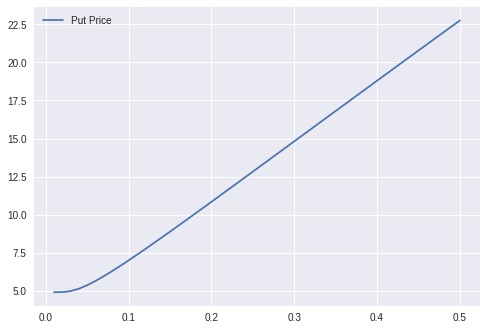

In [26]:
x_var = sigmarange
y_var = gbm_interval.bsm_price(option1)
plt.plot(x_var,y_var,label='Put Price');
plt.legend();

We can observe that, at least on this small interval, the function appears to be strictly increasing. Re-examine the first values to see whether or not it holds near 0:

In [27]:
gbm_interval.bsm_price(option1)

array([ 4.89715222,  4.90288578,  4.96963104,  5.12920586,  5.36050605,
        5.63977529,  5.95095306,  6.28392234,  6.63224815,  6.99171874,
        7.35948883,  7.73357753,  8.11256754,  8.49541972,  8.88135538,
        9.26977954,  9.66022956, 10.05233994, 10.44581778, 10.84042523,
       11.23596676, 11.63227986, 12.02922801, 12.4266954 , 12.82458289,
       13.22280484, 13.62128669, 14.01996301, 14.41877595, 14.81767397,
       15.21661091, 15.61554509, 16.01443868, 16.41325714, 16.81196877,
       17.21054429, 17.60895655, 18.00718024, 18.40519169, 18.80296861,
       19.20049   , 19.59773595, 19.99468753, 20.39132669, 20.78763618,
       21.18359944, 21.57920053, 21.97442411, 22.36925535, 22.76367987])

Now consider a larger-scale version that goes from 0.5 to 20:

In [0]:
sigma_range_2 = np.linspace(0.5,20,40)

In [0]:
gbm_interval_2 = Gbm(init_state = 100, drift_ratio = 0.0475, vol_ratio = sigma_range_2)

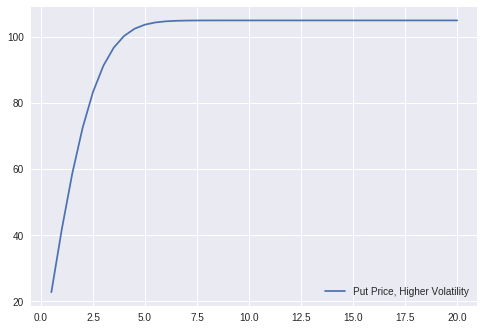

In [30]:
x_var_2 = sigma_range_2
y_var_2 = gbm_interval_2.bsm_price(option1)
plt.plot(x_var_2,y_var_2,label='Put Price, Higher Volatility');
plt.legend();

We observe that it hits what appears to be some form of asymptote after about a volatility of 5. Once more, examine the values:

In [31]:
gbm_interval_2.bsm_price(option1)

array([ 22.76367987,  41.71989443,  58.485352  ,  72.40330438,
        83.2583665 ,  91.21360049,  96.69203048, 100.23729484,
       102.39321807, 103.62521968, 104.28680059, 104.62064825,
       104.7789578 , 104.8495016 , 104.8790411 , 104.89066466,
       104.89496265, 104.89645608, 104.89694371, 104.89709333,
       104.89713647, 104.89714815, 104.89715113, 104.89715184,
       104.897152  , 104.89715204, 104.89715204, 104.89715204,
       104.89715204, 104.89715204, 104.89715204, 104.89715204,
       104.89715204, 104.89715204, 104.89715204, 104.89715204,
       104.89715204, 104.89715204, 104.89715204, 104.89715204])

After this point it would appear that if the values differ, they differ by a value too small for this display to see. Consider a single example:

In [46]:
gbm_test_10 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=10)
gbm_test_11 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=11)
gbm_test_12 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=12)
gbm_test_13 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=13)
gbm_test_14 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=14)
gbm_test_15 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=15)
gbm_test_16 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=16)
gbm_test_17 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=17)
gbm_test_18 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=18)
gbm_test_19 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=19)
gbm_test_20 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=20)

print('Volatility ratio of 10 yields ' + str(gbm_test_10.bsm_price(option1)))
print('Volatility ratio of 11 yields ' + str(gbm_test_11.bsm_price(option1)))
print('Volatility ratio of 12 yields ' + str(gbm_test_12.bsm_price(option1)))
print('Volatility ratio of 13 yields ' + str(gbm_test_13.bsm_price(option1)))
print('Volatility ratio of 14 yields ' + str(gbm_test_14.bsm_price(option1)))
print('Volatility ratio of 15 yields ' + str(gbm_test_15.bsm_price(option1)))
print('Volatility ratio of 16 yields ' + str(gbm_test_16.bsm_price(option1)))
print('Volatility ratio of 17 yields ' + str(gbm_test_17.bsm_price(option1)))
print('Volatility ratio of 18 yields ' + str(gbm_test_18.bsm_price(option1)))
print('Volatility ratio of 19 yields ' + str(gbm_test_19.bsm_price(option1)))
print('Volatility ratio of 20 yields ' + str(gbm_test_20.bsm_price(option1)))

Volatility ratio of 10 yields 104.89709332790189
Volatility ratio of 11 yields 104.89714815482775
Volatility ratio of 12 yields 104.89715184249917
Volatility ratio of 13 yields 104.89715203636264
Volatility ratio of 14 yields 104.89715204432676
Volatility ratio of 15 yields 104.89715204458237
Volatility ratio of 16 yields 104.8971520445888
Volatility ratio of 17 yields 104.8971520445889
Volatility ratio of 18 yields 104.8971520445889
Volatility ratio of 19 yields 104.8971520445889
Volatility ratio of 20 yields 104.8971520445889


We can thus see that the numbers are still increasing, but by amounts too small to properly register here I believe we can safely argue based on the results above that the asymptotic max, $f_{max}$ here is roughly $104.8971520445889$, or $104.90$ if we round to 2 decimal places (to represent it as a price). Next, we have to identify $f_{min}$. Consider a similar process:

In [48]:
gbm_test_01 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=.01)
gbm_test_001 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=.001)
gbm_test_0001 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=.0001)
gbm_test_00001 = Gbm(init_state=100,drift_ratio=0.0475,vol_ratio=.00001)

print('Volatility ratio of 0.00001 yields ' + str(gbm_test_00001.bsm_price(option1)))
print('Volatility ratio of 0.0001 yields ' + str(gbm_test_0001.bsm_price(option1)))
print('Volatility ratio of 0.001 yields ' + str(gbm_test_001.bsm_price(option1)))
print('Volatility ratio of 0.01 yields ' + str(gbm_test_01.bsm_price(option1)))

Volatility ratio of 0.00001 yields 4.897152044588907
Volatility ratio of 0.0001 yields 4.897152044588907
Volatility ratio of 0.001 yields 4.897152044588907
Volatility ratio of 0.01 yields 4.897152217797142


Here, we can see a similar phenomenon. As we approach 0, we see a lower bound asymptote of $f_{min} = 4.897152044588907$, which rounds (as before) to $\$4.90$.

__Conclusions__

* $f_{min} \approx 4.90$, $f_{max} \approx 104.90$
* I believe that $f$ is strictly increasing on $(0, \infty)$ as we can see that where it is observable, the value of $f$ goes up as $\sigma$ goes up, all other factors constant. Where it does not go up, it appears to be reaching an asymptotic upper limit, which it is continuing to approach without decreasing.
* If the market put price is $10$, the implied volatility is $17.867\%$.